In [486]:
%matplotlib notebook
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import ipywidgets as widgets
from ipywidgets import interact, interactive
from IPython.display import display
from ipywidgets import HBox, Label
from ipywidgets import FloatSlider

a=3   #Latice constant in Åmstrongs
sigma=1 #Very arbitrary value
U=200
NrOfK=5
Len_k=15
A=-U*np.sqrt(2 *np.pi)*sigma/a


Andreas Wacker wants real numbers (real dimensions), so we define the constant to convert to electronvolts the kinetic energy term (I mean $\frac{\hbar^2 (k+K)^2}{2m}$)

In [487]:
%run 2Dbandstructure.ipynb

In [488]:
# a=3   #Latice constant in Åmstrongs
# sigma=1 #Very arbitrary value
# U=0/100
# NrOfK=5
# Len_k=5
# A=-U*np.sqrt(2 *np.pi)*sigma/a

# G=2*np.pi/a
# G_list=np.array([[-G,0.0],[G,0.0],[0.0,0.0],[0.0,G],[0.0,-G]])
# kx=0
# ky=4.5

# k_x=np.pi/(a)*kx/Len_k 
# k_y=np.pi/(a)*ky/Len_k
# Eig=np.zeros(shape=(NrOfK, NrOfK))
# for i in range (NrOfK):
#     Eig[i,i] = NormC*((k_x+G_list[i,0])**2+(k_y+G_list[i,1])**2) + A
#     for j in range(i+1,NrOfK):
#         diff_G=(G_list[i,0]-G_list[j,0])**2+(G_list[i,1]-G_list[j,1])**2
#         Eig[i,j]=Eig[j,i]=A*np.exp(-(sigma**2*diff_G)/2) 
# Eig
# E,V=scipy.linalg.eig(Eig)
# # E.sort()
# E

# #find which energy correcponds to the Brilljoun zone to the right
# # if kx>0:
# #     if kx>ky:
# #         E2=0
        

In [489]:
Energies=np.zeros(shape=(Len_k*2+1, Len_k*2+1, NrOfK))
kVect=np.zeros((2,Len_k*2+1,Len_k*2+1))
EnergiesR = Energies[:,:,0].copy()

In [490]:
%%time
Energies=np.zeros(shape=(Len_k*2+1, Len_k*2+1, NrOfK))
kVect=np.zeros((2,Len_k*2+1,Len_k*2+1))

for kx in range(-Len_k,Len_k+1):    
    for ky in range(-Len_k,Len_k+1):
#         %run 2Dbandstructure.ipynb
        k_x=np.pi/(a)*kx/Len_k 
        k_y=np.pi/(a)*ky/Len_k
        E=BandStructF()
        Energies[kx+Len_k,ky+Len_k]=np.real(E)
        
        kVect[0,kx+Len_k,ky+Len_k]=k_x
        kVect[1,kx+Len_k,ky+Len_k]=k_y
        
            #Find the energies of the Brilluin zone to the right
Cond1 = (kVect[0]>=0) & (kVect[0]>=abs(kVect[1]))
Cond2 = (kVect[0]>=0) & (kVect[0]<=abs(kVect[1]))
Cond3 = (kVect[0]<0) & (-kVect[0]<=abs(kVect[1]))
Cond4 = (kVect[0]<0) & (-kVect[0]>=abs(kVect[1]))
EnergiesR[Cond1] = Energies[Cond1,4]
EnergiesR[Cond2] = Energies[Cond2,3]
EnergiesR[Cond3] = Energies[Cond3,2]
EnergiesR[Cond4] = Energies[Cond4,1]
TextB.value = str(sum(Cond1))+" and "+str(sum(Cond2))+" and "+str(sum(Cond3))

EnergiesL = EnergiesR[::-1]
EnergiesU = EnergiesR.T
EnergiesD = EnergiesL.T
kVectR = kVect.copy()
kVectR[0]=kVectR[0]+G
kVectU = kVect.copy()
kVectU[1]=kVectU[1]+G
kVectL = kVect.copy()
kVectL[0]=kVectL[0]-G
kVectD = kVect.copy()
kVectD[1]=kVectD[1]-G


#### The neigbouring Brilluin zones in polar coordinates
EndK = int(Len_k*np.sqrt(2)) + 1 
r = kVect[0][:(EndK),1]+G
p = np.linspace(0, 2*np.pi, 50)
EnergyPolar = EnergiesR[:(EndK),(Len_k+1)]
EnPolar = np.meshgrid(EnergyPolar,p)[0]
R, P = np.meshgrid(r, p)
# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)
maxLim = np.max(EnPolar)
   

Wall time: 1.86 s
Parser   : 102 ms


### Draw also the not calclated regions using the polar coordinates

In [500]:
%%time
InRadius = (np.abs(X)<np.max(kVect[0]) ) & ( np.abs(Y)<np.max(kVect[0])) 
EnPolar[InRadius] = (np.min(Energies)-5000)*2

OutRadius = (np.abs(X)>(np.max(kVect[0])*2) ) | ( np.abs(Y)> (np.max(kVect[0])*2) ) 
EnPolar[OutRadius] = (np.max(Energies)+1000)*2

np.max(kVect[0])


Wall time: 0 ns


1.0471975511965976

<IPython.core.display.Javascript object>


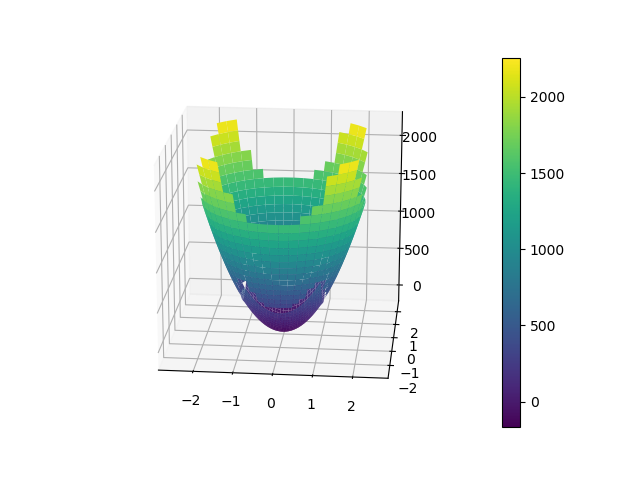

(-167.93648199187223, 2257.425125763427)

In [501]:
fig1 = plt.figure()
ax1 = plt.axes(projection="3d")
mycmap = plt.cm.viridis
mycmap.set_bad('k', alpha=0)
mycmap.set_under('k', alpha=0)
mycmap.set_over('k', alpha=0)

C1 = ax1.plot_surface(X, Y, EnPolar, cmap=mycmap,vmin=np.min(Energies),vmax=maxLim,linewidth=0, rstride=1, cstride=1)
C2 = ax1.plot_surface(kVect[0],kVect[1], Energies[:,:,0],vmin=np.min(Energies),vmax=maxLim, rstride=1, cstride=1,
                cmap=mycmap, edgecolor='none')#Energies[:,:,2]
ax1.set_zlim3d(np.min(Energies),maxLim)
cnar = fig1.colorbar(C2)

<IPython.core.display.Javascript object>


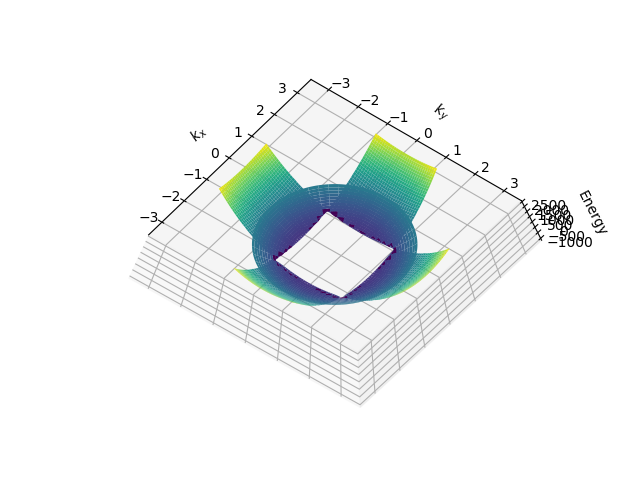

C:\Users\Andris\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, '$k_x$')

Text(0.5, 0, '$k_y$')

Text(0.5, 0, 'Energy')

In [378]:
# %%capture
fig = plt.figure()
ax = plt.axes(projection="3d")
# ax.plot_surface(kVect[0],kVect[1], Energies[:,:,0],vmin=np.min(Energies),vmax=np.max(Energies), rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')#Energies[:,:,2]
ax.plot_surface(kVectR[0],kVectR[1], EnergiesR,vmin=np.min(Energies),vmax=np.max(Energies),cmap='viridis')
ax.plot_surface(kVectL[0],kVectL[1], EnergiesL,vmin=np.min(Energies),vmax=np.max(Energies),cmap='viridis')
ax.plot_surface(kVectU[0],kVectU[1], EnergiesU,vmin=np.min(Energies),vmax=np.max(Energies),cmap='viridis')
ax.plot_surface(kVectD[0],kVectD[1], EnergiesD,vmin=np.min(Energies),vmax=np.max(Energies),cmap='viridis')
ax.plot_surface(X, Y, EnPolar, cmap='viridis',vmin=np.min(Energies),vmax=np.max(Energies))

ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('Energy')
# plt.colorbar(m)



<IPython.core.display.Javascript object>


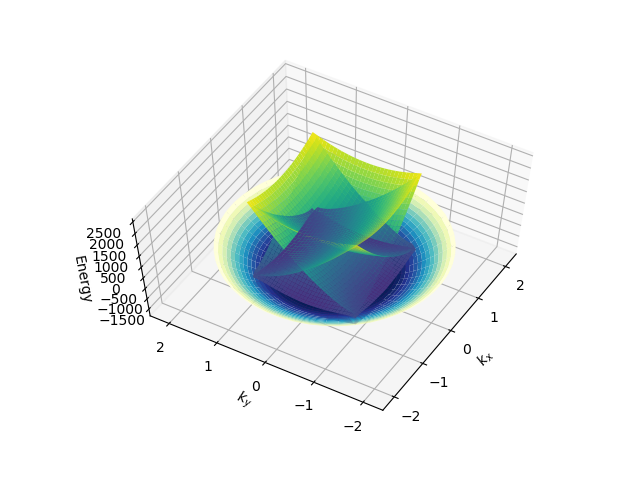

Text(0.5, 0, '$k_x$')

Text(0.5, 0, '$k_y$')

Text(0.5, 0, 'Energy')

In [251]:
# %%capture
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(kVect[0],kVect[1], Energies[:,:,0],vmin=np.min(Energies),vmax=np.max(Energies), rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')#Energies[:,:,2]
ax.plot_surface(kVect[0],kVect[1], EnergiesR,vmin=np.min(Energies),vmax=np.max(Energies),cmap='viridis')
ax.plot_surface(kVect[0],kVect[1], EnergiesL,vmin=np.min(Energies),vmax=np.max(Energies),cmap='viridis')
ax.plot_surface(kVect[0],kVect[1], EnergiesU,vmin=np.min(Energies),vmax=np.max(Energies),cmap='viridis')
ax.plot_surface(kVect[0],kVect[1], EnergiesD,vmin=np.min(Energies),vmax=np.max(Energies),cmap='viridis')
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('Energy')

In [136]:
TextB = widgets.HTML(value="TTT"+str(5))

In [137]:
def f(Pot=U,*args):
    global A, kx, ky
    U=Pot
#     TextB.value=str(A)
    
    A=-U*np.sqrt(2 *np.pi)*sigma/a
#     TextB.value="Value = "+str(A)
    for kx in range(-Len_k,Len_k+1):    
        for ky in range(-Len_k,Len_k+1):
            E=BandStructF()
#             %run 2Dbandstructure.ipynb
            Energies[kx+Len_k,ky+Len_k]=np.real(E)
#             kVect[0,kx+Len_k,ky+Len_k]=kx
#             kVect[1,kx+Len_k,ky+Len_k]=ky
    #ax.cla()
    ax = plt.axes(projection="3d")
    ax.plot_surface(kVect[0],kVect[1], Energies[:,:,0], rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

    ax.set_xlabel('$k_x (1/ \AA)$')
    ax.set_ylabel('$k_y (1/ \AA)$')
    ax.set_zlabel('Energy (eV)')
    
    

#     print(Cond1)
    
    
    
The_Interaction=interactive(f,Pot=widgets.FloatSlider(min=0,max=100,step=1, continuous_update = False) ) 

In [138]:
# def f(Pot=U,*args):
#     U=Pot
# #     TextB.value=str(A)
#     Energies=np.zeros(shape=(Len_k*2+1, Len_k*2+1, NrOfK))
#     kVect=np.zeros((2,Len_k*2+1,Len_k*2+1))
#     widgets.HTML(value="Value = "+str(A))
    
# The_Interaction=interactive(f,Pot=widgets.FloatSlider(min=0,max=1000,step=1, continuous_update = False) ) 

In [139]:
for widg in The_Interaction.children[:-1]:
    widg.description = ""
#     widg.continuous_update = False
    

pot = The_Interaction.children[0]

FirstBox = widgets.HBox([Label(r'Potential'), pot])


HTML(value='TTT5')

<IPython.core.display.Javascript object>


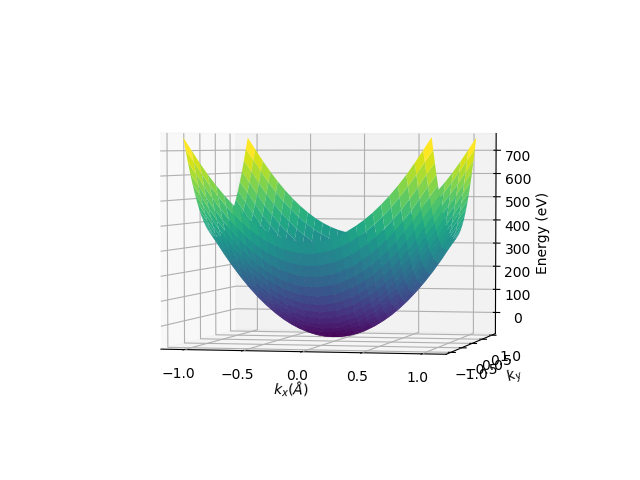

In [141]:
display(FirstBox)
TextB
fig

In [71]:
Cond1

NameError: name 'Cond1' is not defined

In [85]:
f(5)

[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False]
 [False False False False False Fal